# Titanic dataset
## Feature adding and engineering
## Models used:
* Logistic regression
* SVM
* Decision Tree 
* AdaBoost
* Random Forest


In [435]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score

%matplotlib inline

In [314]:
train = pd.read_csv("./train.csv", index_col='PassengerId')
train.shape

(891, 11)

### Looking at the training data we have:
* 10 features and 1 label (binary) currently

In [315]:
df1 = pd.read_csv("./test.csv", index_col='PassengerId')
df1.head(5)
df1.shape

(418, 10)

In [316]:
# truth table
df2 = pd.read_csv("./gender_submission.csv",index_col='PassengerId') 
df2.head(5)
df2.shape

(418, 1)

In [317]:
test = df1.join(df2)
test.head(5)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [318]:
# Exploring data types
print(train.describe(), train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000

## The class is decently balanced
* No skewness

In [319]:
train.groupby('Survived').count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


## Lets explore each feature

## Survivors by Sex

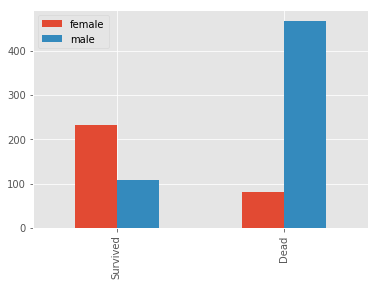

In [320]:
survivors_by_sex = train[train['Survived']==1]['Sex'].value_counts()
dead_by_sex = train[train['Survived']==0]['Sex'].value_counts()
stats_by_sex= pd.DataFrame([survivors_by_sex, dead_by_sex],index=['Survived','Dead'])
stats_by_sex.plot(kind='bar')

## Survivors by Age
* More deaths in 20-40

/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


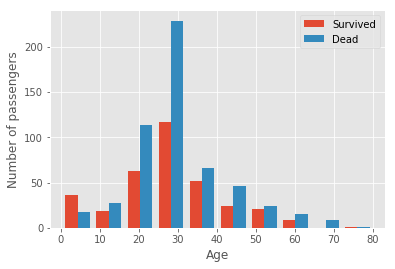

In [321]:
train['Age'].fillna(train['Age'].median(), inplace=True)
plt.hist([train[train['Survived']==1]['Age'],train[train['Survived']==0]['Age']],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

## Survivors by Fare
* Doesn't seem to be a useful feature


/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


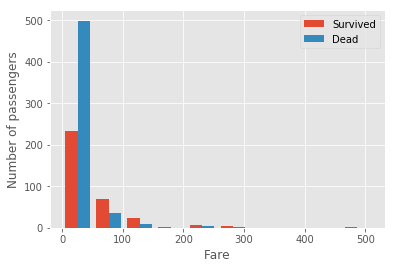

In [322]:
plt.hist([train[train['Survived']==1]['Fare'],train[train['Survived']==0]['Fare']],
         bins = 10,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()

## Survivors by Pclass
* pclass =3 has high no of deads
and fare corresponds to the pclass 3='high' fare. 

I think we can eliminate fare as well

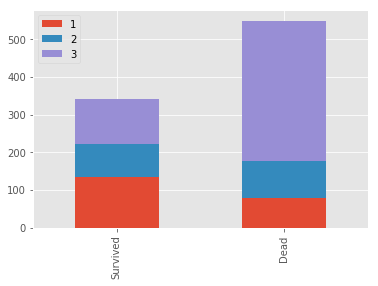

In [323]:
survivors_by_pclass = train[train['Survived']==1]['Pclass'].value_counts()
dead_by_pclass = train[train['Survived']==0]['Pclass'].value_counts()
stats_by_pclass= pd.DataFrame([survivors_by_pclass, dead_by_pclass],index=['Survived','Dead'])
stats_by_pclass.plot(kind='bar',stacked=True)

# Survivors by Embarked
* doesn't seem to be a good feature as emabrkment from S has both hogh survivors and dead

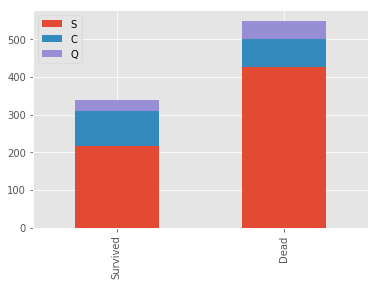

In [324]:
survivors_by_embarked = train[train['Survived']==1]['Embarked'].value_counts()
dead_by_embarked = train[train['Survived']==0]['Embarked'].value_counts()
stats_by_embarked = pd.DataFrame([survivors_by_embarked, dead_by_embarked],index=['Survived','Dead'])
stats_by_embarked.plot(kind='bar',stacked=True)

## Survivors by Family size (Parch + sibSp)
* If you are single you are dead

/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


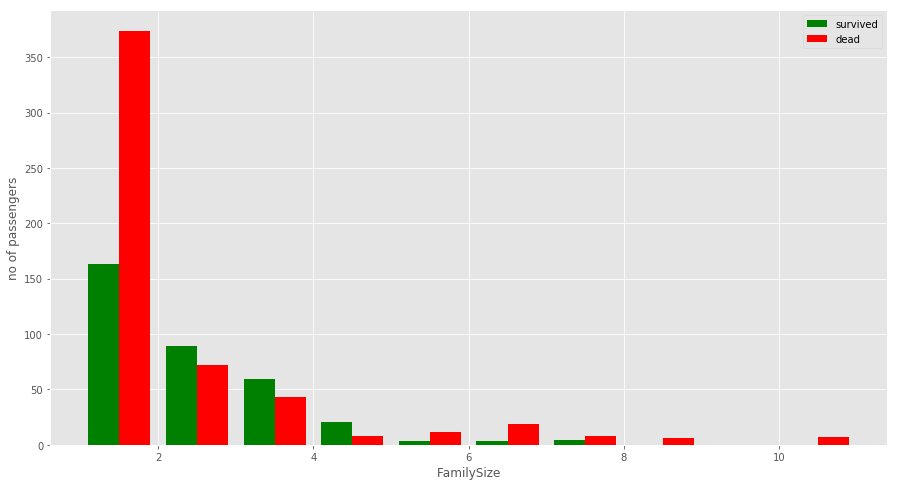

In [325]:
train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.set_ylabel('no of passengers')
ax.set_xlabel('FamilySize')
ax.hist([train[train['Survived']==1]['FamilySize'],train[train['Survived']==0]['FamilySize']],color = ['g','r'],label=['survived','dead'])
ax.legend()

In [326]:
train.groupby('Cabin').count().head(5) # quite a lot of cabins!

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
Cabin,,,,,,,,,,,
A10,1,1,1,1,1,1,1,1,1,1,1
A14,1,1,1,1,1,1,1,1,1,1,1
A16,1,1,1,1,1,1,1,1,1,1,1
A19,1,1,1,1,1,1,1,1,1,1,1
A20,1,1,1,1,1,1,1,1,1,1,1


# Combined feature engineering on test & train as the features gonna explode

In [327]:
combined = train.append(test)
combined.head(5)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age           1223 non-null float64
Cabin         295 non-null object
Embarked      1307 non-null object
FamilySize    891 non-null float64
Fare          1308 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


## Logical Imputation
This is for my convenience not how it's done.

Note: I switched back to train originial df after the age bar graph, to perform this imputation on entire dataset 

In [328]:
combined['Age'].fillna(combined['Age'].median(),inplace=True)
combined['Embarked'].fillna('S',inplace=True)
combined.Cabin.fillna('U',inplace=True)
combined.Fare.fillna(combined.Fare.mean(),inplace=True)
combined.head(5)

,Age,Cabin,Embarked,FamilySize,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,,
1,22.0,U,S,2.0,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,U,S,1.0,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,U,S,1.0,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


## Family Size

In [329]:
# The size of families (including the passenger)
combined['FamilySize'] = combined['Parch'] + combined['SibSp'] + 1
# Introducing other features based on the family size
combined['Alone'] = combined['FamilySize'].map(lambda s : 1 if s == 1 else 0)
combined['Small'] = combined['FamilySize'].map(lambda s : 1 if 2<=s<=4 else 0)
combined['Large'] = combined['FamilySize'].map(lambda s : 1 if s>=5 else 0)

# One-hot encoding 
* manually for age
* others by pandas

In [330]:
combined['0-20'] = combined['Age'].apply(lambda x: 1 if x>=0 and x<20 else 0)
combined['20-40'] = combined['Age'].apply(lambda x: 1 if x>=20 and x<40 else 0)
combined['40-60'] = combined['Age'].apply(lambda x: 1 if x>=40 and x<60 else 0)
combined['60-80'] = combined['Age'].apply(lambda x: 1 if x>=60 and x<=80 else 0)

In [331]:
def get_one_hot_encoding(df, features):
    for feature in features:
        if feature in df.columns:
            dummies = pd.get_dummies(df[feature],prefix=feature)
            df = pd.concat([df,dummies],axis=1)
    return df

In [332]:
combined = get_one_hot_encoding(combined,['Embarked','Cabin','Pclass'])
combined['Sex'] = combined['Sex'].map({'male':0,'female':1})
combined.drop(['Embarked','Cabin','Pclass','Embarked','Age','FamilySize','Ticket','Name','Parch','SibSp'],inplace=True,axis=1)

In [337]:
combined.head(5)

,Fare,Sex,Survived,Alone,Small,Large,0-20,20-40,40-60,60-80,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,7.2500,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,71.2833,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,7.9250,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,53.1000,1,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,8.0500,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [334]:
train_final = combined.head(1309-418)
test_final = combined.tail(418)

In [351]:
trainY = train_final.Survived

In [355]:
train_final.drop(['Survived'], inplace=True,axis=1)

/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [357]:
train_final.head(5)

,Fare,Sex,Alone,Small,Large,0-20,20-40,40-60,60-80,Embarked_C,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,7.2500,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,71.2833,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,7.9250,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,53.1000,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,8.0500,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [336]:
test_final.shape

(418, 203)

In [358]:
testY = test_final.Survived

In [359]:
test_final.drop(['Survived'], inplace=True,axis=1)

/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [360]:
test_final.head(5)

,Fare,Sex,Alone,Small,Large,0-20,20-40,40-60,60-80,Embarked_C,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,7.8292,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
893,7.0000,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
894,9.6875,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
895,8.6625,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
896,12.2875,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


## Lets scale the data

In [363]:
scaler = MinMaxScaler()
vals = scaler.fit_transform(train_final)

In [366]:
train_final.loc[:,:] = vals

/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [367]:
train_final.head(5)

,Fare,Sex,Alone,Small,Large,0-20,20-40,40-60,60-80,Embarked_C,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.014151,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.139136,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.015469,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.103644,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.015713,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [369]:
# scal test data separately
vals2 = scaler.transform(test_final)

In [371]:
test_final.loc[:,:] = vals2

/Users/aniruddhkhera/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [372]:
test_final.head(5)

,Fare,Sex,Alone,Small,Large,0-20,20-40,40-60,60-80,Embarked_C,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,0.015282,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
893,0.013663,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
894,0.018909,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
895,0.016908,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
896,0.023984,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Feature Selection

In [374]:

clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(train_final, trainY)
features = pd.DataFrame()
features['feature'] = train_final.columns
features['importance'] = clf.feature_importances_
cols =  features.sort_values(['importance'],ascending=False)['feature']
model = SelectFromModel(clf, prefit=True)
train_new = model.transform(train_final)
test_new = model.transform(test_final)

In [376]:
train_new.shape

(891, 17)

In [377]:
test_new.shape

(418, 17)

In [380]:
# features selected
cols

1                    Sex
0                   Fare
201             Pclass_3
198              Cabin_U
3                  Small
199             Pclass_1
2                  Alone
200             Pclass_2
5                   0-20
6                  20-40
11            Embarked_S
4                  Large
9             Embarked_C
7                  40-60
91         Cabin_C22 C26
8                  60-80
10            Embarked_Q
164            Cabin_E24
104            Cabin_C52
165            Cabin_E25
72         Cabin_B96 B98
161            Cabin_E12
75            Cabin_C104
101            Cabin_C49
163            Cabin_E17
20             Cabin_A23
193            Cabin_F33
77            Cabin_C106
162           Cabin_E121
159            Cabin_E10
             ...        
32             Cabin_B10
87            Cabin_C130
31              Cabin_A9
88            Cabin_C132
97             Cabin_C39
95             Cabin_C31
13             Cabin_A11
93             Cabin_C28
108             Cabin_C6


# Now lets build our Models

In [439]:
# Decision tree
tree = DecisionTreeClassifier()
parameter_grid = {
                 'max_depth' : [4,5,6,7,8,9],
                 'criterion': ['gini','entropy']
                 }

grid_search_dt = GridSearchCV(tree,
                           param_grid=parameter_grid,
                           cv=10)

grid_search_dt.fit(train_new, trainY)

print('Best score: {}'.format(grid_search_dt.best_score_))
print('Best parameters: {}'.format(grid_search_dt.best_params_))

Best score: 0.8249158249158249
Best parameters: {'criterion': 'gini', 'max_depth': 7}


In [438]:
# Random Forest
forest = RandomForestClassifier(max_features='sqrt')

parameter_grid = {
                 'max_depth' : [4,5,6,7,8,9],
                 'n_estimators': [20,50,100, 200,210,240,250],
                 'criterion': ['gini','entropy']
                 }

grid_search_forest = GridSearchCV(forest,
                           param_grid=parameter_grid,
                           cv=10)

grid_search_forest.fit(train_new, trainY)

print('Best score: {}'.format(grid_search_forest.best_score_))
print('Best parameters: {}'.format(grid_search_forest.best_params_))

Best score: 0.8249158249158249
Best parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 20}


In [437]:
# Logistic Regression
logit = LogisticRegression(penalty='l2')
parameter_grid = { 'max_iter': [100,200],
                   'tol' : [0.1,0.01,0.001,10,1]}
grid_search_logit = GridSearchCV(logit,param_grid=parameter_grid, cv=10)
grid_search_logit.fit(train_new, trainY)
print('Best score: {}'.format(grid_search_logit.best_score_))
print('Best parameters: {}'.format(grid_search_logit.best_params_))

Best score: 0.8159371492704826
Best parameters: {'max_iter': 100, 'tol': 0.01}


In [440]:
# AdaBoost
adaboost = AdaBoostClassifier()
parameter_grid = { 'n_estimators': [20,50,100,200], 'learning_rate': [.001,.003,.01,.03,.1,.3,1] }
grid_search_adaBoost = GridSearchCV(adaboost ,param_grid=parameter_grid, cv=10)
grid_search_adaBoost.fit(train_new, trainY)
print('Best score: {}'.format(grid_search_adaBoost.best_score_))
print('Best parameters: {}'.format(grid_search_adaBoost.best_params_))

Best score: 0.8092031425364759
Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [445]:
# SVM Linear
svc = SVC(kernel='linear')
parameter_grid = { 'C': [.001,.003,.01,.03,.1,.3,1] }
grid_search_svc = GridSearchCV(svc ,param_grid=parameter_grid, cv=10)
grid_search_svc.fit(train_new, trainY)
print('Best score: {}'.format(grid_search_svc.best_score_))
print('Best parameters: {}'.format(grid_search_svc.best_params_))

Best score: 0.8069584736251403
Best parameters: {'C': 0.01}


In [447]:
# SVM Gaussian kernel
svc = SVC(kernel='rbf')
parameter_grid = { 'C': [.001,.003,.01,.03,.1,.3,1] }
grid_search_svcKernel = GridSearchCV(svc ,param_grid=parameter_grid, cv=10)
grid_search_svcKernel.fit(train_new, trainY)
print('Best score: {}'.format(grid_search_svcKernel.best_score_))
print('Best parameters: {}'.format(grid_search_svcKernel.best_params_))

Best score: 0.8035914702581369
Best parameters: {'C': 1}


# PREDICTIONS

In [441]:
#logistic regression
predictions = grid_search_logit.predict(test_new)
accuracy_score(testY, predictions)

0.94736842105263153

In [442]:
#random forest
predictions = grid_search_forest.predict(test_new)
accuracy_score(testY, predictions)

0.85406698564593297

In [443]:
#decision tree
predictions = grid_search_dt.predict(test_new)
accuracy_score(testY, predictions)

0.82296650717703346

In [444]:
# adaboost
predictions = grid_search_adaBoost.predict(test_new)
accuracy_score(testY, predictions)

0.98803827751196172

In [446]:
# svm linear
predictions = grid_search_svc.predict(test_new)
accuracy_score(testY, predictions)

0.9425837320574163

In [448]:
# svm gaussian kernel
predictions = grid_search_svcKernel.predict(test_new)
accuracy_score(testY, predictions)

0.98086124401913877